Random Forest Results
Mean Squared Error (MSE): 26375.620560443796
Mean Absolute Error (MAE): 111.62478606219477
R-squared: 0.3043973761637897

Comparison of Actual vs Predicted:
      Actual Duration  Predicted Duration
664                0           15.587312
363              122           73.542255
110              695          527.609115
678              295          161.025937
39                67          412.820911


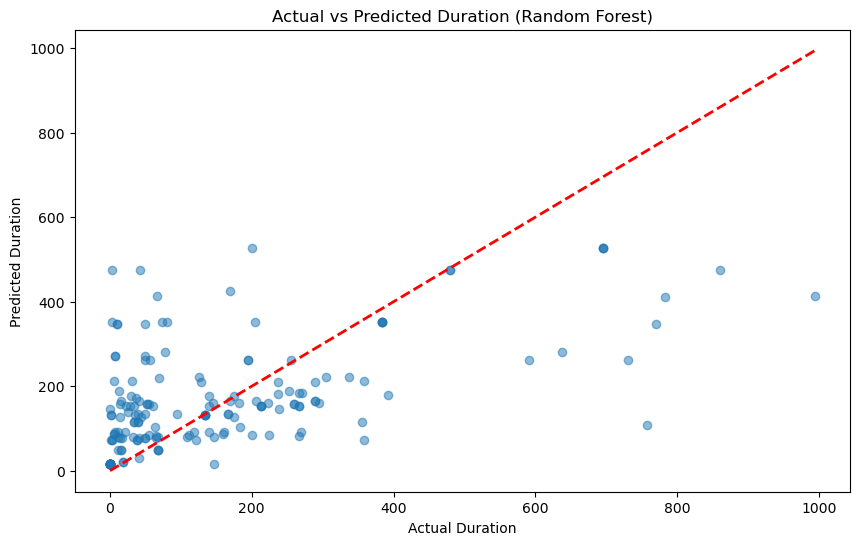

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('recalls_from_db.csv')

# Dropping rows with missing dates
df = df.dropna(subset=['Center Classification Date', 'Termination Date'])

# Convert date columns to datetime format
df['Center Classification Date'] = pd.to_datetime(df['Center Classification Date'])
df['Termination Date'] = pd.to_datetime(df['Termination Date'])

# Calculate the duration between Center Classification Date and Termination Date
df['Duration'] = (df['Termination Date'] - df['Center Classification Date']).dt.days

# Extract year and month
df['Center Classification Year'] = df['Center Classification Date'].dt.year
df['Center Classification Month'] = df['Center Classification Date'].dt.month

X = df[['Center Classification Year', 'Center Classification Month']]
y = df['Duration']

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2)

# Train the model using the training set
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print("Random Forest Results")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

# Create a DataFrame to compare actual and predicted durations
comparison_df = pd.DataFrame({'Actual Duration': y_test, 'Predicted Duration': y_pred})

print("\nComparison of Actual vs Predicted:\n", comparison_df.head())

# Plot the actual vs predicted durations
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration (Random Forest)')
plt.show()